# DSP2 - Lab 03


## Abstract
The tasks of this will be around the Adaptiv LMS Filter

In [1]:
%pip install padasip==1.1.1

## Experiment 1: Padasip LMS application
In this experiment, you will work the first time with an Adaptive LMS Filter. By means of a signal with interference a simple noise reduction will be performed.

This notebook will guide you through step-by-step.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal  # handy for signal genration

import padasip as pa

Create an arbritrary signal in the following cell. The fancier and random, the better. 
But, take care: don't let it be too high-frequent (so not just plain random noise)!

_Hint:_ You can create a completely random signal (`np.random`) and apply a lowpass filter ($W_n=0.05$) on to that. For a hint, have a look [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html).

Visualize the signal.

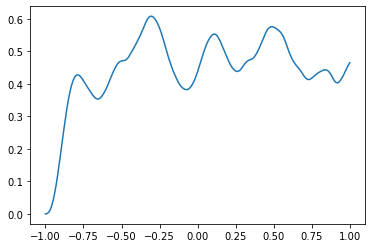

In [2]:
# YOUR CODE HERE

# generate a random signal
# YOUR CODE HERE
t = np.linspace(-1, 1, 201)
x = np.random.random_sample(t.shape[0])

# filter with a lowpass filter
# 3-rd order Butteworth Low-Pass - Omega = 0.05
b, a = signal.butter(3, 0.05)
x2 = signal.lfilter(b, a, x)
plt.plot(t, x2)

Next, generate a random, interfering signal $d$. This must be of lower signal power (lower amplitude). 

In order to to simulate the transmission through air and reflexions (in real life), apply a filter ($b = [1, -0.8, 0.4 , -0.2]$) onto the signal $d$ to generate the noise that is added to the "used"/wanted signal.

Visualize both signals.

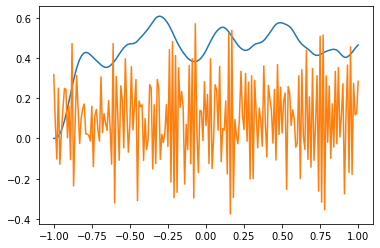

In [3]:
# YOUR CODE HERE

# random interfering signal
t = np.linspace(-1, 1, 201)
d = np.random.random_sample(t.shape[0]) * 0.5

b2 = [1, -0.8, 0.4, -0.2]
d2 = signal.lfilter(b2, 1, d)

plt.plot(t, x2)
plt.plot(t, d2)

Next, generate $\widehat{y}$ (add the signal to the noise). Visualize this signal $\widehat{y}$.

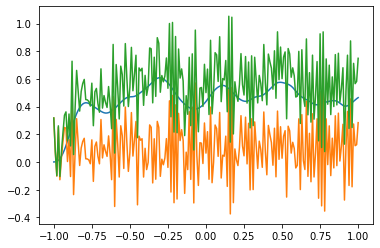

In [4]:
# YOUR CODE HERE
# add signal to noise
signal_w_noise = x2 + d2

plt.plot(t, x2)
plt.plot(t, d2)
plt.plot(t, signal_w_noise)

Now, apply the LMS Filter on to the signal $\widehat{y}$ and $d$.

To prepare the input $\widehat{y}$ for the LMS, apply the function [`pa.input_from_history`](http://matousc89.github.io/padasip/sources/preprocess/input_from_history.html).

Start with a very low $\mu$/$\alpha$ ($\sim n \cdot 10^{-3}$) and number of taps similar to what you have used in the filtering of the $noise$.

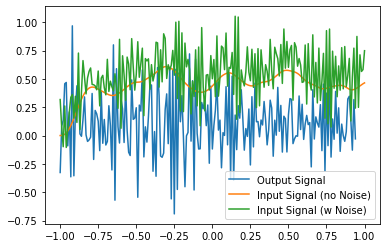

In [5]:
# YOUR CODE HERE
filter_taps = 6

y_hat = pa.input_from_history(signal_w_noise, filter_taps)[:-1]

# LMS Filter
f = pa.filters.FilterLMS(n=filter_taps, mu=0.1, w="random")
y, e, w = f.run(d2[:-filter_taps], y_hat)


plt.plot(t[:-filter_taps], y, label='Output Signal')

plt.plot(t, x2, label='Input Signal (no Noise)')
#plt.plot(t, d2, label='Interference signal')
plt.plot(t, signal_w_noise, label='Input Signal (w Noise)')
plt.legend()
plt.show()

Visualize the error, that was made at each step. Additionally, for sake of simplicit, also include a mean over 10 samples.

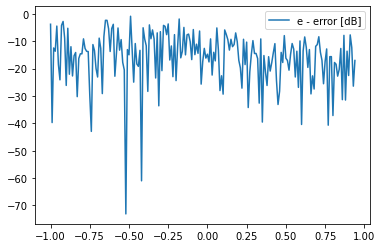

In [6]:
# YOUR CODE HERE
plt.plot(t[:-filter_taps], 10*np.log10(e**2), label="e - error [dB]")
plt.legend()
plt.show()

The resulting coefficients $b_n$ are?

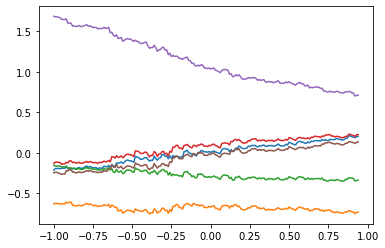

In [7]:
# YOUR CODE HERE
plt.plot(t[:-filter_taps], w)
plt.show()

## Lab Experiment 2: Your own LMS Filter

Let's start with a fresh workspace!

In [77]:
%reset -sf

In the following, implement your own LMS Adaptive Filter from scratch. Use the following function sceleton and fill in the corresponding, missing, code. The rest is given.

For details on implementation, please be referred to the lecture script, slides, and your notes.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa

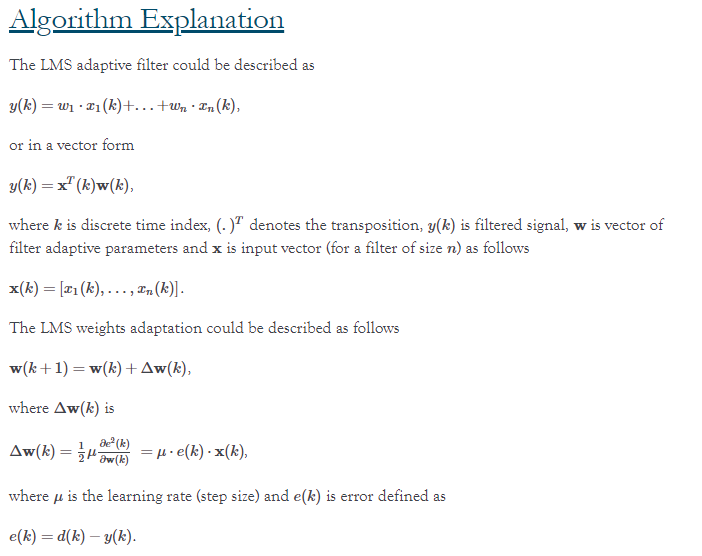

In [144]:
# YOUR CODE HERE
def my_lms_filter(interference_signal, signal, mu, b):
    
    y = np.zeros(signal.shape[0])
    
    filter_taps = b.shape[0]
    e = np.zeros([signal.shape[0]])
    delta_w = np.zeros([signal.shape[0]])
    
    # for loop through whole signal
    w = b
    for i in range(0,signal.shape[0]-filter_taps):
        y[i] = 0
        delta_w[i] = 0
        
        # error 
        e[i] = interference_signal[i] - y[i-1]
        
        # weight change
        delta_w[i] = mu * e[i] * signal[i]
        print(str(w))        
        for j in range(0, filter_taps):
            y[i] = y[i] + (w [j] * signal[i+j])
            
            # calcualte new weights
            w[j] = w[j-1] + delta_w[i]
            

    # y = output
    # d2 = interference signal
    # y_hat = signal_w_noise
    # e = error
    # w = weights

    return y, e, w

[0.69622592 0.06693662 0.38233103 0.9669429 ]
[0.96452281 0.96210271 0.95968261 0.95726252]
[0.95537182 0.95348113 0.95159043 0.94969974]
[0.93824812 0.9267965  0.91534488 0.90389326]
[0.88673692 0.86958058 0.85242424 0.8352679 ]
[0.83610264 0.83693738 0.83777212 0.83860686]
[0.82468946 0.81077206 0.79685467 0.78293727]
[0.7827744  0.78261154 0.78244867 0.7822858 ]
[0.77967734 0.77706889 0.77446043 0.77185197]
[0.73846478 0.70507758 0.67169039 0.6383032 ]
[0.62402248 0.60974176 0.59546105 0.58118033]
[0.55934291 0.53750548 0.51566806 0.49383063]
[0.48241781 0.47100498 0.45959216 0.44817933]
[0.44374817 0.43931701 0.43488584 0.43045468]
[0.42642048 0.42238628 0.41835209 0.41431789]
[0.41189304 0.40946819 0.40704333 0.40461848]
[0.37932284 0.3540272  0.32873156 0.30343591]
[0.30419504 0.30495416 0.30571329 0.30647241]
[0.30217692 0.29788142 0.29358593 0.28929043]
[0.28797031 0.28665019 0.28533007 0.28400995]
[0.27479609 0.26558224 0.25636838 0.24715453]
[0.23446634 0.22177815 0.20908996 

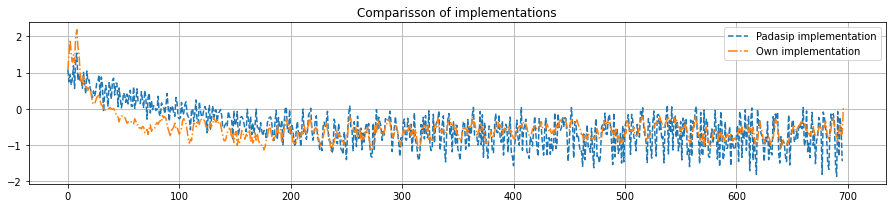

In [150]:
# creation of x and d
N = 700
taps = 4
mu=0.01

u = np.random.random(N)
d = np.zeros(N)
for k in range(taps, N):
    d[k] = 2*u[k] + 0.1*u[k-1] - 4*u[k-2] + 0.5*u[k-3]
d = d[taps:]

# initial FIR coefficients
b_init = np.random.rand(taps)

# identification
x = pa.input_from_history(u, 4)[:-1]

# own lms
result_own, _, w = my_lms_filter(d, u, mu=mu, b=b_init.copy())

# padasip
f = pa.filters.FilterLMS(mu=mu, n=taps, w=b_init.copy())
result_padasip, _, w2 = f.run(d, x)

# visualization of the results
plt.figure(figsize=(12.5,3))
plt.title("Comparisson of implementations")
plt.plot(result_padasip, '--', label="Padasip implementation")
plt.plot(result_own, '-.', label="Own implementation")
plt.grid();plt.legend(); plt.tight_layout(); plt.show()

Calculate and display the mean squared error between the results of the two versions.

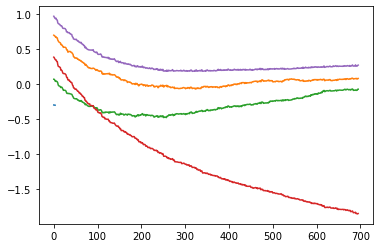

In [151]:
# YOUR CODE HERE
plt.plot(w)
plt.plot(w2)

Here are is a testcase for you to check your implementation

In [ ]:
x = np.random.rand(5000)
xx = pa.input_from_history(x, 4)[:-1]
d = np.random.rand(4996)
b_init = np.random.rand(4)

a, _, _ = my_lms_filter(d, x, mu=0.5, b=b_init.copy())
b, _, _ = pa.filters.FilterLMS(mu=0.5, n=4, w=b_init.copy()).run(d, xx)

np.testing.assert_array_equal(a[:-4], b)

## (optional) Experiment 3: Apply an Adaptive LMS Filter to an real-world example

Till now, you only worked on synthetic data. Try to apply your algorithm to the soundfile `file_no_delay.wav`, provided using the LMS system. With this file you find two channels with data:
- the one channel is data with noise (speaker with background noise)
- the second channel does only have the isolated background noise

The goal is to minimize the noise as much as possible.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# References
    [1] Matou≈° Cejnek. Python Adaptive Signal Processing Handbook. ASPICC. Available at: https://github.com/matousc89/Python-Adaptive-Signal-Processing-Handbook (visited on 02/18/2021).